In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data, standardising, etc.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('mobile_cleaned.csv')

XX = data.drop('Rating',axis=1)
Y = data['Rating'].values #values convert to np array.

In [4]:
# binarised Y for categorical ouput

thresh = 4.2
data['class'] = ( data['Rating'] >= thresh ).astype(int)
data['class'].value_counts(normalize = True) # checking for class imbalance

0    0.533724
1    0.466276
Name: class, dtype: float64

In [5]:
# split into train, test
# do standardisation on inputs(features)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
Y_binarised = data['class'].values #binarised Y - nd array
XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y,random_state=0,stratify=Y_binarised)
# stratify based on the binarised ouput(categorical)

ss = StandardScaler()

XX_train_standardised = ss.fit_transform(XX_train) #standardise all columns of XX_train
#now the parameter - mean , std - are that of train data

#use that to transform test data.
XX_test_standardised = ss.transform(XX_test) #we are standardising test data with train data's -mean, SD

In [7]:
# min max scaling on Y, as sigmoid gives ouput in 0-1

from sklearn.preprocessing import MinMaxScaler

In [8]:
mm_scalar = MinMaxScaler()

Y_train_scaled = mm_scalar.fit_transform(Y_train.reshape(-1,1)) #'fit_transform' for train
#reshape because need as column.

Y_test_scaled = mm_scalar.transform(Y_test.reshape(-1,1)) # 'transform' for test
# min , max of train to map(transform) test also.

In [9]:
#binarising the transformed Y.

#first must transform the threshold
thresh_scaled = mm_scalar.transform( np.array([thresh]).reshape(-1,1) )[0][0]

# binarise with the transformed threshold
Y_binaraised_train = (Y_train_scaled > thresh_scaled).astype(int).ravel()
Y_binaraised_test = (Y_test_scaled > thresh_scaled).astype(int).ravel()

so we transformed XX using a standardised scalar  
and transformed Y using a min-max scalar (to bring outputs b/w 0,1)

### Training sigmoid neuron on this data:

In [10]:
from sigmoid_neuron import SigmoidNeuron

In [11]:
sn = SigmoidNeuron()

sn.fit(XX_train_standardised, Y_train_scaled, epochs = 1000, alpha=0.2)

first find parameters - fit ("trining")  
then predict output for both train, test data using the found parameters  
compare train accuracy, test accuracy

In [12]:
Y_pred_train = sn.predict(XX_train_standardised)
Y_pred_test = sn.predict(XX_test_standardised)

# binarise the predicted value with the same threshold
# we want class-output to find the classification accuracy

Y_pred_binarised_train = (Y_pred_train > thresh_scaled).astype('int').ravel()
Y_pred_binarised_test = (Y_pred_test > thresh_scaled).astype('int').ravel()

#### accuracy

In [13]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(Y_pred_binarised_train, Y_binaraised_train)
acc_test = accuracy_score(Y_pred_binarised_test, Y_binaraised_test)

print(acc_train, acc_test)

#change epochs and see.

0.5254901960784314 0.5348837209302325


eg. if increasing epochs accuracy is going low, or not improving, it could be because of over stepping.  
in that case try decreasing learning rate and increasing #epochs.

### Plotting loss(MSE) Vs epochs

what is happening as epochs are changing  
we can plot and see... instead of randomly changing values. 

How is total-loss changing with each epoch.

In [14]:
# sigmoid neuron class which tracks/populates loss after each epoch
# and display it (loss vs epochs) after training (all epochs)

# MSE - using sklearn.metrics.mean_squared_error
# mean_squared_error(predicted, true)

from sigmoid_neuron_v2 import SigmoidNeuronV2

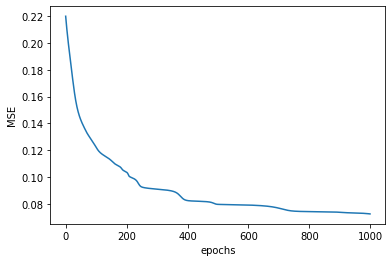

In [15]:
sn = SigmoidNeuronV2()

sn.fit(XX_train_standardised, Y_train_scaled, epochs = 1000, alpha=0.01, display_loss=True)

this is loss-vs-epochs plot  

initially there is be a large drop  
fine tune hyperparameters by refering to the loss plot

eg - if we see loss is going down - then give it more space to decrease even further by increasing the number of epochs  

eg - on seing saturation - first try increase learning rate - giving more push to learning  
then if we see - its decreasing further - then we can give it more space by increasing the number of epochs  

### tqdm progress bar

for us to see how much training has progressed (how many epochs completed so far)  

change the epoch for loop in fit() (training) to a tqdm loop

**"wrap around the iterator"** - replace iterator with `tqdm(iterator)` (can pass other args also)

In [16]:
from tqdm import notebook
import time

# demo

# for i in range()
# instead:
for i in notebook.tqdm( range(5), total = 5 , unit = "runs"):
    time.sleep(1) #1 second

  0%|          | 0/5 [00:00<?, ?runs/s]

In [17]:
# sigmoid neuron class with tqdm
from sigmoid_neuron_v3 import SigmoidNeuronV3

  0%|          | 0/1000 [00:00<?, ?epochs/s]

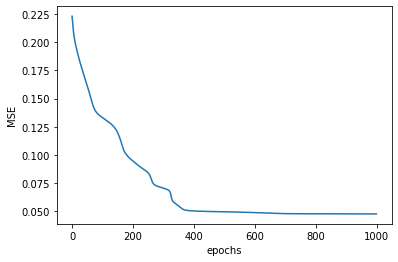

In [19]:
sn = SigmoidNeuronV3()

sn.fit(XX_train_standardised, Y_train_scaled, epochs = 1000, alpha=0.01, display_loss=True)

tqdm bar also shows the rate of running(time per epoch). With this we can estimate how long will it take more.

### exercises

- what happens when toy data is not linearly seperable. find out the role of learning rate there.
- change threshold for binarising - see what happens when data is not balanced.
- try different hyperparameters - epochs, learning rate. - compare MSE, accuracy for different 

- here, we updated after finding gradient for all datapoints - taking average of those.    
  instead update after finding gradient with one datapoint - also highlight which point it is.  
  see how different points are making the change in decision boundary.
  
eg: a point which is already in the right area will not significantly affect the decision boundary  
but a point which is say, in the opposite region - will significantly affect.  
large slope part??